In [134]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
from datetime import datetime

In [127]:
r = requests.get('https://www.carreradelasempresas.com/clasificaciones23/buscador_absoluta.php?sex=M&car=10K')

In [128]:
parsed_html = BeautifulSoup(r.content)

In [129]:
c = parsed_html.body.find('div', attrs={'class':'buscar'})

In [160]:
df = pd.DataFrame(columns =["Posicion", "Nombre", "Empresa", "Tiempo"] )
for elm in c.find_all('p'):
    pattern = r'<p><span class="rojo">(\d+)<\/span>  (.*) - <strong>(.*)<\/strong> - ([\d:]+)<\/p>'
    match = re.search(pattern, str(elm))
    df = pd.concat([df,pd.DataFrame(data = [list(match.groups())], columns =["Posicion", "Nombre", "Empresa","Tiempo"] )])

In [149]:
df["Tiempo"] = pd.to_datetime(df["Tiempo"],format ="%H:%M:%S")

In [161]:
df["Tiempo"] = pd.to_timedelta(df["Tiempo"])

In [162]:
df[df["Empresa"] == '']
#df[df["Empresa"] == 'AQUILA GROUP']

,Posicion,Nombre,Empresa,Tiempo
0,728,CÉSAR MARRÓN MATTA,,0 days 00:43:59
0,1456,DAVID ZURITA,,0 days 00:47:13
0,1713,ISIDORO TORRES FONTAN,,0 days 00:48:09
0,1972,IGNACIO FERNÁNDEZ RODRÍGUEZ,,0 days 00:49:00
0,5532,MIGUEL GONZALEZ PEREZ,,0 days 01:03:52
0,5823,ENRIQUE MOUTEIRA VERASATEGUI,,0 days 01:10:17


In [180]:
dfG = df.groupby(['Empresa'])['Tiempo'].agg(['sum','size'])
dfG["avg"] = dfG['sum'].div(dfG['size'])
dfG = dfG.drop(columns = ["sum"]).reset_index()
dfG[dfG["size"]>10].sort_values(by = "avg").head(40)

,Empresa,size,avg
187,CHEMA CARPINTERO,17,0 days 00:42:50.352941176
301,FAES FARMA S.A.,15,0 days 00:45:38.066666666
352,GONVARRI CORPORACION FINANCIERA S.L,33,0 days 00:46:48.424242424
238,DECATHLON,12,0 days 00:46:48.833333333
506,"MARTINREA HONSEL SPAIN, S.L.U",16,0 days 00:46:59.062500
68,AQUILA GROUP,13,0 days 00:47:28.307692307
173,CBRE REAL ESTATE,14,0 days 00:47:32.928571428
652,SALESFORCE,11,0 days 00:47:59.909090909
48,ALSA GRUPO,12,0 days 00:48:32.083333333
499,MAHOU SAN MIGUEL,28,0 days 00:48:36.357142857


TypeError: The DType <class 'numpy.dtype[timedelta64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float64]'>)

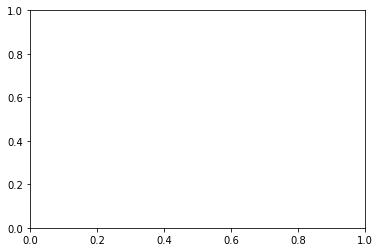

In [181]:
df["Tiempo"].hist()

In [174]:
dfG = df.groupby(['Empresa'])['Tiempo'].agg(['sum','size'])
dfG["avg"] = dfG['sum'].div(dfG['size'])
dfG = dfG.drop(columns = ["sum"]).reset_index()
dfG

,Empresa,size,avg
0,,6,0 days 00:53:45
1,"AB-EIC CONTROL REGLAMENTARIO, S.L.",3,0 days 00:50:50.333333333
2,ABANCA GESTION DE ACTIVOS,1,0 days 00:46:16
3,ABEI ENERGY AND INFRASTRUCTURE SL,9,0 days 00:55:01.111111111
4,"ABG INTELLECTUAL PROPERTY LAW, S.L.",2,0 days 00:50:44.500000
...,...,...,...
781,XTB S.A. SUCURSAL EN ESPAÑA,3,0 days 01:02:53.333333333
782,"YABA VENTURES, SAU",1,0 days 00:49:03
783,"ZABALA INNOVATION CONSULTING, S.A.",1,0 days 00:58:17
784,"ZEUS CONTROL, SA",5,0 days 00:51:55.600000


In [142]:
df.groupby("Empresa")\
       .agg({'Nombre':'size', 'Tiempo':'mean'}) \
       .rename(columns={'Nombre':'count','Tiempo':'mean_sent'}) \
       .reset_index()

DataError: No numeric types to aggregate

In [125]:
for key, val in df.groupby("Empresa")["Nombre"].count().sort_values(ascending = False).iteritems():
    print(key, val, val/df.count()[0]*100, "%")

DELOITTE, S.L. 142 3.3721206364284018 %
ILUNION 99 2.3509855141296603 %
GMV 97 2.303490857278556 %
REPSOL COMERCIAL DE P.P., S.A. 73 1.7335549750653052 %
CARREFOUR LIFE 69 1.6385656613630968 %
PWC 58 1.3773450486820233 %
EY ESPAÑA 54 1.2823557349798147 %
CANAL DE ISABEL II 52 1.2348610781287106 %
BANKINTER SA 47 1.11612443600095 %
AHORRAMAS, S.A. 45 1.0686297791498456 %
TECNICAS REUNIDAS 44 1.0448824507242935 %
AUTONOMOS 40 0.9498931370220851 %
GRUPO MUTUA MADRILEÑA 38 0.9023984801709808 %
AMAZON ESPAÑA 29 0.6886725243410117 %
INDRA SOLUCIONES TI S.L.U 27 0.6411778674899073 %
ADIF 27 0.6411778674899073 %
ACCENTURE 27 0.6411778674899073 %
GMS MANAGEMENT SOLUTIONS SL 26 0.6174305390643553 %
AL AIR LIQUIDE ESPAÑA SA 24 0.5699358822132511 %
EXIDE TECHNOLOGIES SLU 23 0.5461885537876989 %
GSK 23 0.5461885537876989 %
TECNICA Y PROYECTOS S.A 21 0.49869389693659466 %
FUNDACION CORAZON DE TITAN 21 0.49869389693659466 %
ID LOGISTICS 20 0.47494656851104256 %
RTVE 20 0.47494656851104256 %
LABORATOR

BBVA CFE 5 0.11873664212776064 %
PLUS CORPORATE SL 5 0.11873664212776064 %
RHEINMETALL EXPAL MUNITIONS 5 0.11873664212776064 %
DAC BEACHCROFT SLPU 5 0.11873664212776064 %
ANSYS 5 0.11873664212776064 %
CLUB DEPORTIVO NATURGY 5 0.11873664212776064 %
TOMSA DESTIL S.L. 5 0.11873664212776064 %
TOLSA, S.A 5 0.11873664212776064 %
SAP ESPAÑA S.A. 5 0.11873664212776064 %
TICKETBIS S.L. 5 0.11873664212776064 %
ARTELIA SPAIN SLU 5 0.11873664212776064 %
ARTHUR D. LITTLE 5 0.11873664212776064 %
COSENTINO GLOBAL, S.L.U. 5 0.11873664212776064 %
COMPAÑIA ESPAÑOLA DE SISTEMAS AERONAUTICOS, SAU 5 0.11873664212776064 %
BABEL SISTEMAS DE INFORMACION S.L 5 0.11873664212776064 %
ALTER S.L. 5 0.11873664212776064 %
BERGE Y COMPAÑIA SA 5 0.11873664212776064 %
ONETOONE CORPORATE FINANCE 5 0.11873664212776064 %
BUHLER, S.A. 5 0.11873664212776064 %
CAF POWER &amp; AUTOMATION 5 0.11873664212776064 %
ODIGO IBERIA S.L.U. 5 0.11873664212776064 %
ACTIVE INTERNATIONAL CORPORATE TRADING ESPAÑA S.L. 5 0.11873664212776064

SENSIA SOLUTIONS SL 2 0.04749465685110425 %
CBRE PROJECT MANAGEMENT 2 0.04749465685110425 %
SALESIANOS ESTRECHO SAN JUAN BAUTISTA 2 0.04749465685110425 %
SAS INSTITUTE, SAU 2 0.04749465685110425 %
SPLITMANIA S.L. 2 0.04749465685110425 %
BTS 2 0.04749465685110425 %
SOTO DEL LUGAR SL 2 0.04749465685110425 %
BNP PARIBAS FACTOR SA 2 0.04749465685110425 %
SEPSAMEDHA 2 0.04749465685110425 %
ASPENTECH 2 0.04749465685110425 %
BLUETAB SOLUTION 2 0.04749465685110425 %
SIGNALIT TECHNOLOGY S.L.U 2 0.04749465685110425 %
BIOMERIEUX ESPAÑA 2 0.04749465685110425 %
SINCRO ASESORES DE EMPRESA SLPU 2 0.04749465685110425 %
SIPORT21 2 0.04749465685110425 %
BAUSCH &amp; LOMB 2 0.04749465685110425 %
SOLUCIONES DOSPLANOS SL 2 0.04749465685110425 %
CECA MAGAN ABOGADOS 2 0.04749465685110425 %
CENTUM DIGITAL 2 0.04749465685110425 %
BANCO SANTANDER SA 2 0.04749465685110425 %
STRONGHOLD ASSET MANAGEMENT S.L. 2 0.04749465685110425 %
TEKNEI INFORMATION TECHNOLOGY SL 2 0.04749465685110425 %
ASSERLEX GRADUADOS SOCIALE

In [126]:
df.count()[0]

4211

In [70]:
string = '<p><span class="rojo">2</span>  GUILLERMO PÁRAMO IGLESIAS - <strong>IMTO PACK, S.L.</strong> - 00:21:49</p>'
pattern = r'<p><span class="rojo">(\d+)<\/span>  ([\w ]+) - <strong>([\w ]+)<\/strong> - ([\d:]+)<\/p>'
match = re.search(pattern, str(c.find_all('p')[0]))

In [71]:
list(match.groups())

['1', 'CRISTIAN MARTINEZ ALAEZ', 'DECATHLON', '00:20:55']

In [42]:
str(c.find_all('p')[0])

'<p><span class="rojo">1</span>  CRISTIAN MARTINEZ ALAEZ - <strong>DECATHLON</strong> - 00:20:55</p>'